In [8]:
# Experiments
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
import pandas as pd
def plot_pca(X,y, title="PCA"):
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c = y)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

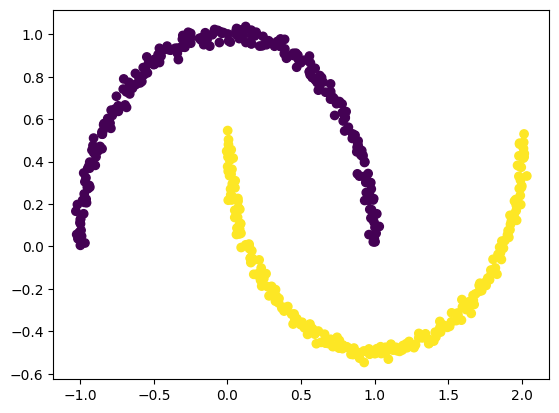

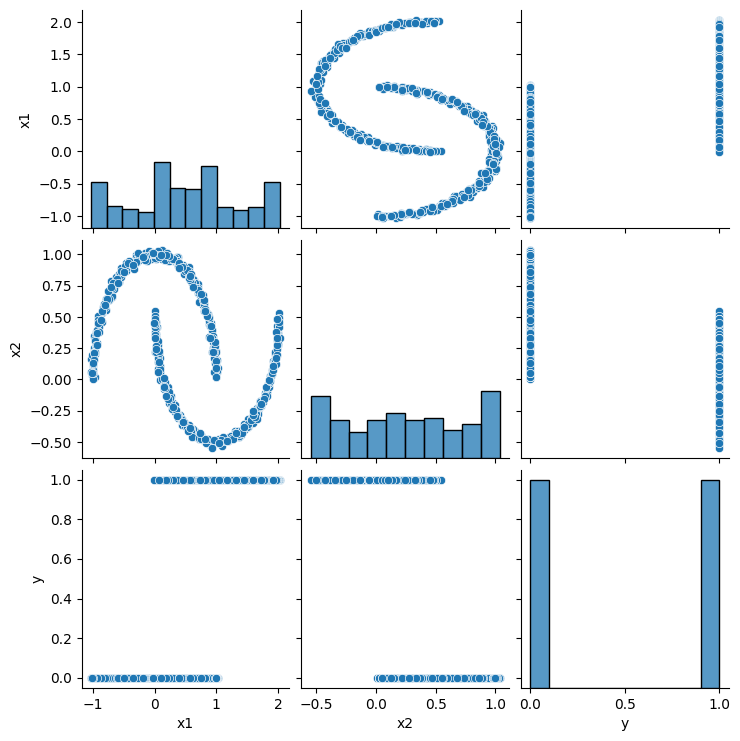

In [10]:


X, y = make_moons(n_samples = 500, noise = 0.02, random_state = 417)
df = pd.DataFrame(X, columns = ['x1', 'x2'])
df['y'] = y
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()
sns.pairplot(df)

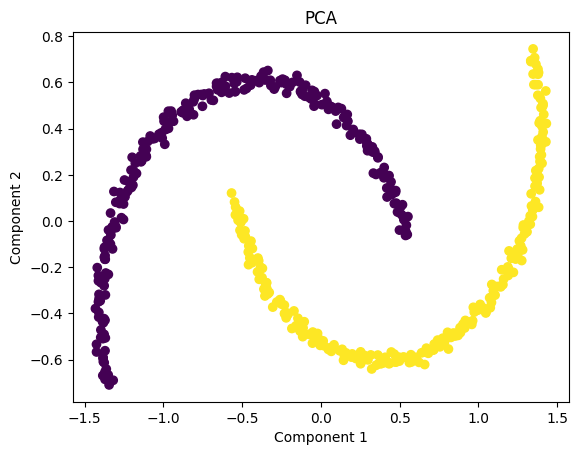

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)


plot_pca(X_pca,y)


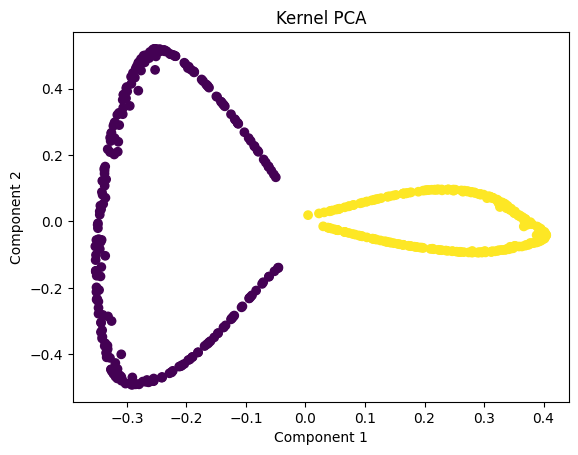

In [31]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel ='rbf', gamma = 15)
X_kpca = kpca.fit_transform(X)

plot_pca(X_kpca,y, title="Kernel PCA")


In [20]:
# Robust PCA
# Example of Robust PCA implementation
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

def robust_pca(X, n_components=2, max_iter=10, tol=1e-7):
    """A simple implementation of Robust PCA"""
    # Initialize
    n, m = X.shape
    L = np.zeros((n, m))
    S = np.zeros((n, m))

    mu = 1.0 / np.sqrt(n)
    lam = 1.0 / np.sqrt(n)

    for i in range(max_iter):
        # Update L using SVD
        Y = X - S
        U, sigma, Vt = np.linalg.svd(Y, full_matrices=False)

        # Apply soft thresholding
        sigma_threshold = np.maximum(sigma - mu, 0)
        r = np.count_nonzero(sigma_threshold)

        if r > 0:
            L = U[:, :r] @ np.diag(sigma_threshold[:r]) @ Vt[:r, :]
        else:
            L = np.zeros_like(X)

        # Update S using soft thresholding
        Y = X - L
        S = np.sign(Y) * np.maximum(np.abs(Y) - lam, 0)

        # Check convergence
        if np.linalg.norm(X - L - S, 'fro') / np.linalg.norm(X, 'fro') < tol:
            break

    # Apply standard PCA on the low-rank component L
    pca = PCA(n_components=n_components)
    L_transformed = pca.fit_transform(L)

    return L_transformed, L, S, pca

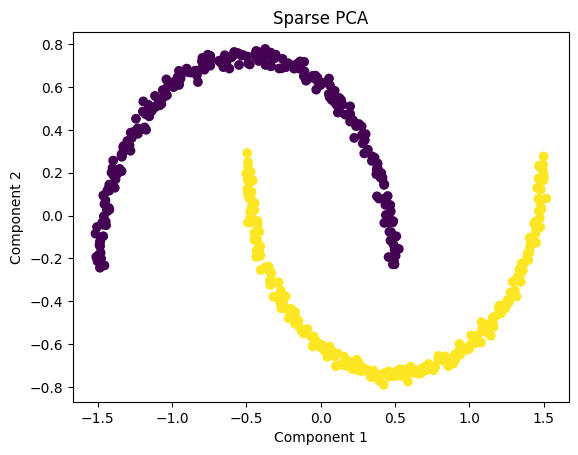

In [32]:
#Sparse PCA
from sklearn.decomposition import SparsePCA

# Example usage:
spca = SparsePCA(n_components=2, alpha=1, ridge_alpha=0.01)
X_transformed = spca.fit_transform(X)
plot_pca(X_transformed,y, title="Sparse PCA")

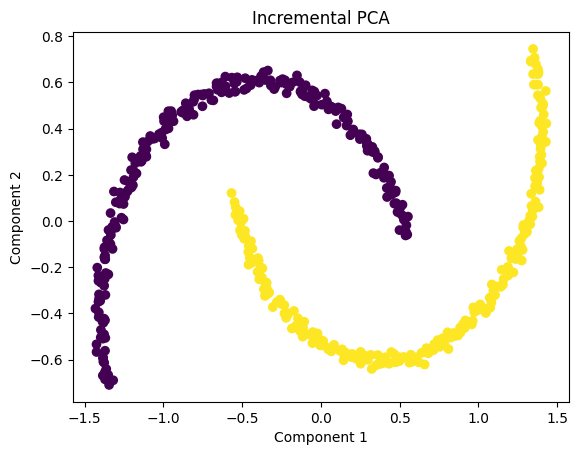

In [33]:
#Incremental PCA
from sklearn.decomposition import IncrementalPCA

# Initialize
ipca = IncrementalPCA(n_components=2, batch_size=100)

# Fit in batches
for batch in np.array_split(X, 10):
    ipca.partial_fit(batch)

# Transform the data
X_ipca = ipca.transform(X)
plot_pca(X_ipca,y, title="Incremental PCA")